In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/80-cereals/cereal.csv


In [2]:
import pandas as pd

# Load the dataset
file_path = '/kaggle/input/80-cereals/cereal.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataframe
print(df.head())


                        name mfr type  calories  protein  fat  sodium  fiber  \
0                  100% Bran   N    C        70        4    1     130   10.0   
1          100% Natural Bran   Q    C       120        3    5      15    2.0   
2                   All-Bran   K    C        70        4    1     260    9.0   
3  All-Bran with Extra Fiber   K    C        50        4    0     140   14.0   
4             Almond Delight   R    C       110        2    2     200    1.0   

   carbo  sugars  potass  vitamins  shelf  weight  cups     rating  
0    5.0       6     280        25      3     1.0  0.33  68.402973  
1    8.0       8     135         0      3     1.0  1.00  33.983679  
2    7.0       5     320        25      3     1.0  0.33  59.425505  
3    8.0       0     330        25      3     1.0  0.50  93.704912  
4   14.0       8      -1        25      3     1.0  0.75  34.384843  


In [3]:
# Get basic information about the dataframe
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      77 non-null     object 
 1   mfr       77 non-null     object 
 2   type      77 non-null     object 
 3   calories  77 non-null     int64  
 4   protein   77 non-null     int64  
 5   fat       77 non-null     int64  
 6   sodium    77 non-null     int64  
 7   fiber     77 non-null     float64
 8   carbo     77 non-null     float64
 9   sugars    77 non-null     int64  
 10  potass    77 non-null     int64  
 11  vitamins  77 non-null     int64  
 12  shelf     77 non-null     int64  
 13  weight    77 non-null     float64
 14  cups      77 non-null     float64
 15  rating    77 non-null     float64
dtypes: float64(5), int64(8), object(3)
memory usage: 9.8+ KB
None


In [4]:
# Get a statistical summary of the numeric columns
print(df.describe())


         calories    protein        fat      sodium      fiber      carbo  \
count   77.000000  77.000000  77.000000   77.000000  77.000000  77.000000   
mean   106.883117   2.545455   1.012987  159.675325   2.151948  14.597403   
std     19.484119   1.094790   1.006473   83.832295   2.383364   4.278956   
min     50.000000   1.000000   0.000000    0.000000   0.000000  -1.000000   
25%    100.000000   2.000000   0.000000  130.000000   1.000000  12.000000   
50%    110.000000   3.000000   1.000000  180.000000   2.000000  14.000000   
75%    110.000000   3.000000   2.000000  210.000000   3.000000  17.000000   
max    160.000000   6.000000   5.000000  320.000000  14.000000  23.000000   

          sugars      potass    vitamins      shelf     weight       cups  \
count  77.000000   77.000000   77.000000  77.000000  77.000000  77.000000   
mean    6.922078   96.077922   28.246753   2.207792   1.029610   0.821039   
std     4.444885   71.286813   22.342523   0.832524   0.150477   0.232716  

In [5]:
# Display the column names
print(df.columns)

Index(['name', 'mfr', 'type', 'calories', 'protein', 'fat', 'sodium', 'fiber',
       'carbo', 'sugars', 'potass', 'vitamins', 'shelf', 'weight', 'cups',
       'rating'],
      dtype='object')


In [6]:
# Check for missing values
print(df.isnull().sum())

# Drop rows with missing values (if any)
df = df.dropna()

# Alternatively, you can fill missing values if appropriate
# df = df.fillna(method='ffill')  # Forward fill missing values


name        0
mfr         0
type        0
calories    0
protein     0
fat         0
sodium      0
fiber       0
carbo       0
sugars      0
potass      0
vitamins    0
shelf       0
weight      0
cups        0
rating      0
dtype: int64


type
C    74
H     3
Name: count, dtype: int64


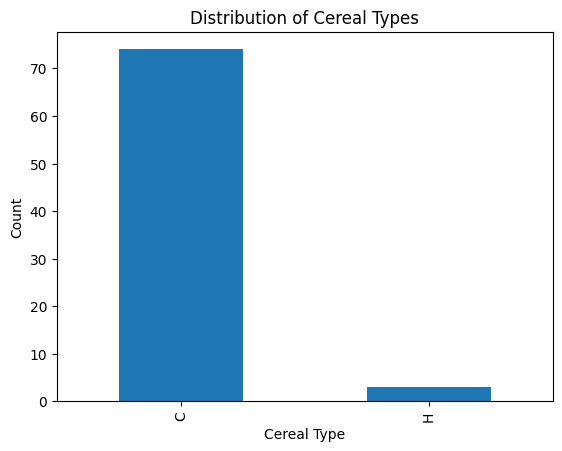

In [7]:
# Assuming there's a 'type' column for the type of cereal
cereal_type_counts = df['type'].value_counts()
print(cereal_type_counts)

# Plot the distribution
import matplotlib.pyplot as plt

cereal_type_counts.plot(kind='bar')
plt.title('Distribution of Cereal Types')
plt.xlabel('Cereal Type')
plt.ylabel('Count')
plt.show()


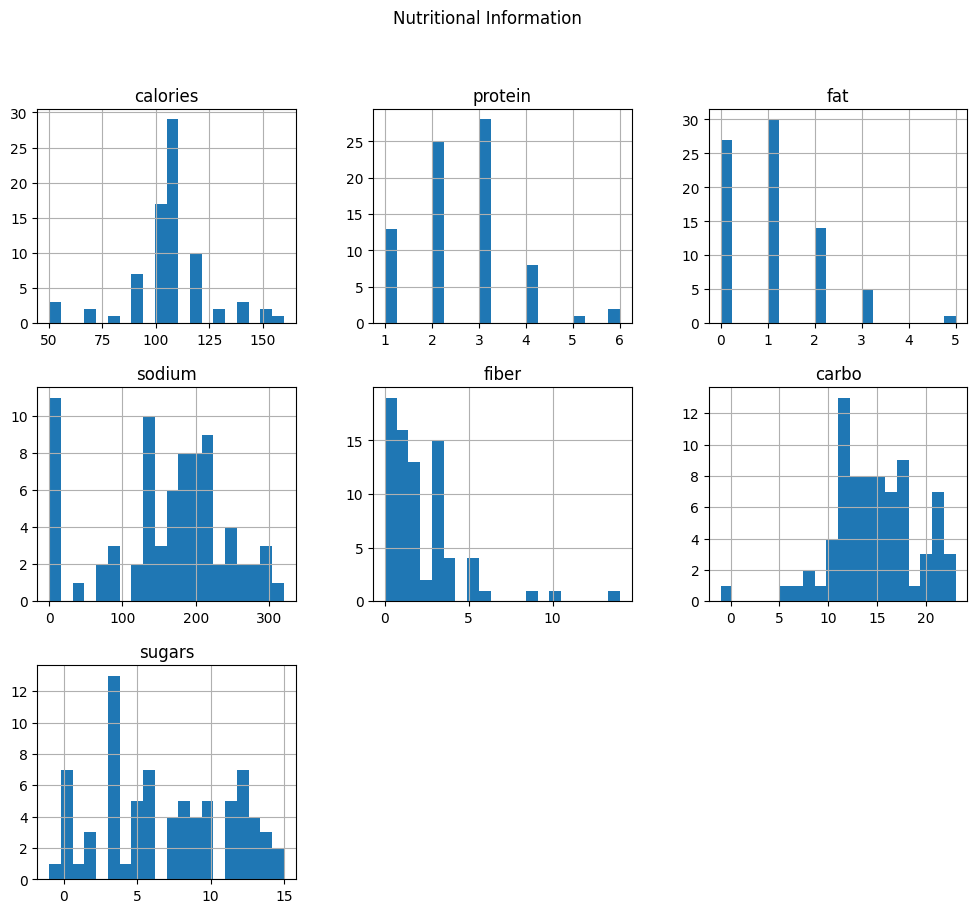

In [8]:
# Plot histograms for nutritional information
df[['calories', 'protein', 'fat', 'sodium', 'fiber', 'carbo', 'sugars']].hist(bins=20, figsize=(12, 10))
plt.suptitle('Nutritional Information')
plt.show()


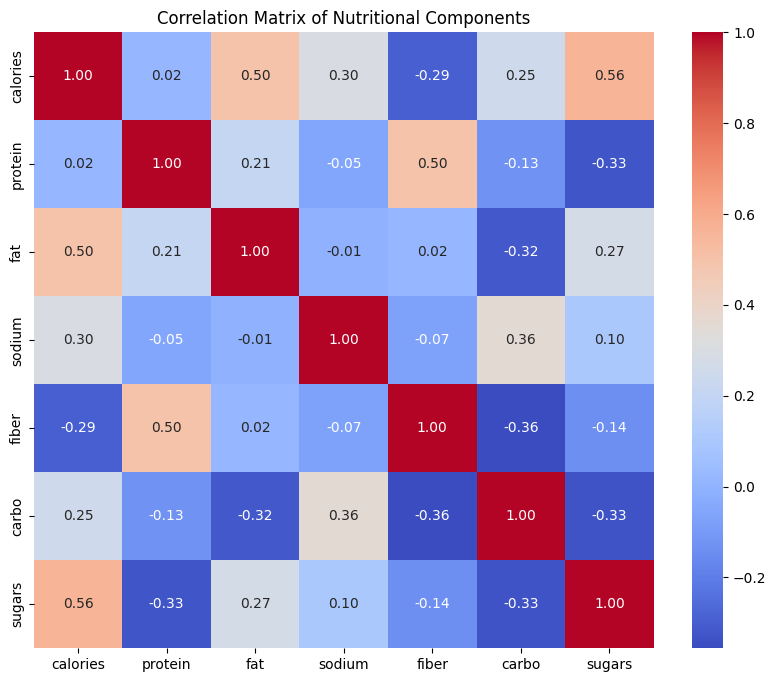

In [9]:
# Compute correlation matrix
correlation_matrix = df[['calories', 'protein', 'fat', 'sodium', 'fiber', 'carbo', 'sugars']].corr()

# Plot the heatmap
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Nutritional Components')
plt.show()


name
Mueslix Crispy Blend                 160.0
Muesli Raisins; Dates; & Almonds     150.0
Muesli Raisins; Peaches; & Pecans    150.0
Total Raisin Bran                    140.0
Just Right Fruit & Nut               140.0
Name: calories, dtype: float64


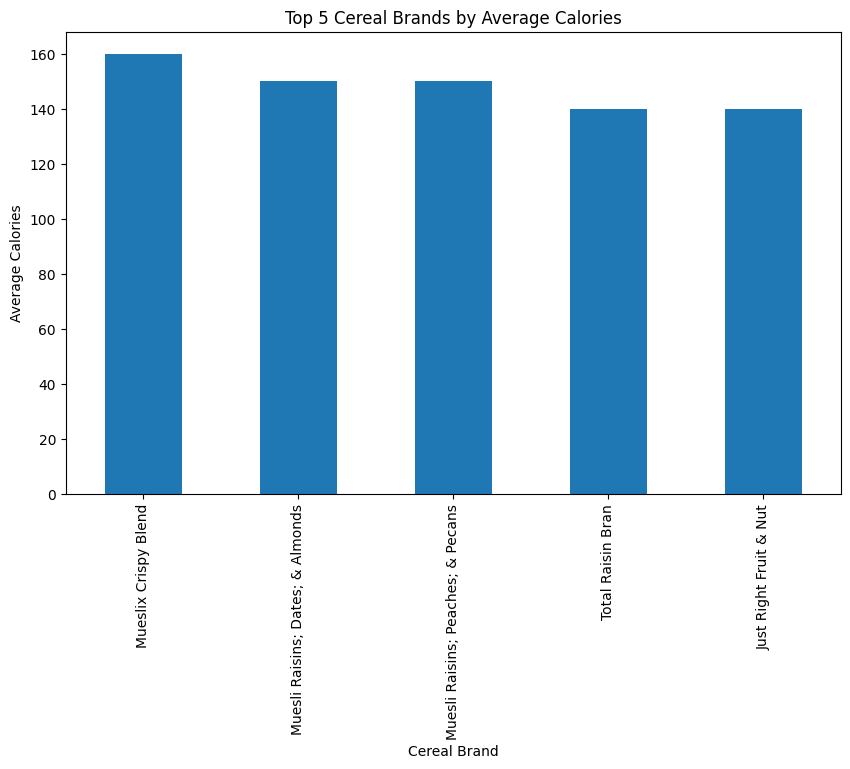

In [10]:
# Compute average calories per cereal brand
average_calories = df.groupby('name')['calories'].mean().sort_values(ascending=False).head(5)
print(average_calories)

# Plot the top 5 brands
average_calories.plot(kind='bar', figsize=(10, 6))
plt.title('Top 5 Cereal Brands by Average Calories')
plt.xlabel('Cereal Brand')
plt.ylabel('Average Calories')
plt.show()

